# Importing Data and Libs

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("/content/drive/MyDrive/BADM576/home_price-1.csv")

# EDA and Feature Engineering

In [3]:
df.head()

,per_capita_crime_rate,proportion_large_lots,proportion_non_retail_business,by_river,nitric_oxide_concentration,avg_no_of_rooms_per_home,proportion_old_homes,avg_distance_from_downtown,highway_access_index,property_tax_per_10k,pupil_teacher_ratio,percentage_lower_status_population,median_value_of_home(1000s_dollars)
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   per_capita_crime_rate                506 non-null    float64
 1   proportion_large_lots                506 non-null    float64
 2   proportion_non_retail_business       506 non-null    float64
 3   by_river                             506 non-null    int64  
 4   nitric_oxide_concentration           506 non-null    float64
 5   avg_no_of_rooms_per_home             506 non-null    float64
 6   proportion_old_homes                 506 non-null    float64
 7   avg_distance_from_downtown           506 non-null    float64
 8   highway_access_index                 506 non-null    int64  
 9   property_tax_per_10k                 506 non-null    int64  
 10  pupil_teacher_ratio                  506 non-null    float64
 11  percentage_lower_status_populati

In [5]:
df_main = df.copy()

In [6]:
# Split the dataset into train and test sets
train_data, test_data = train_test_split(df_main, test_size=0.3, random_state=42)

In [7]:
# Create a correlation matrix
corr_matrix = train_data.corr()
print(corr_matrix)

                                     per_capita_crime_rate  \
per_capita_crime_rate                             1.000000   
proportion_large_lots                            -0.205413   
proportion_non_retail_business                    0.399643   
by_river                                         -0.041852   
nitric_oxide_concentration                        0.402031   
avg_no_of_rooms_per_home                         -0.210556   
proportion_old_homes                              0.336697   
avg_distance_from_downtown                       -0.371149   
highway_access_index                              0.622745   
property_tax_per_10k                              0.582164   
pupil_teacher_ratio                               0.296443   
percentage_lower_status_population                0.409681   
median_value_of_home(1000s_dollars)              -0.380453   

                                     proportion_large_lots  \
per_capita_crime_rate                            -0.205413   
proport

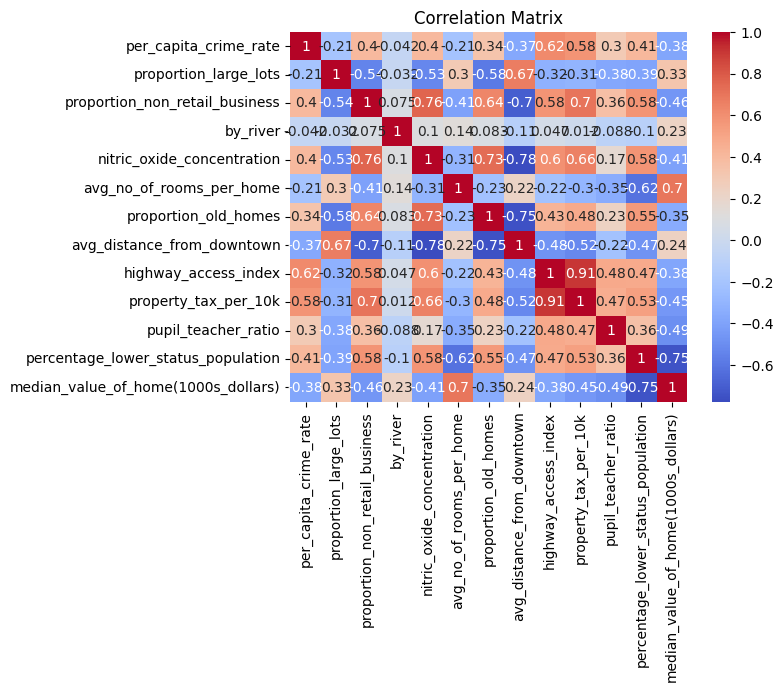

In [8]:
# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

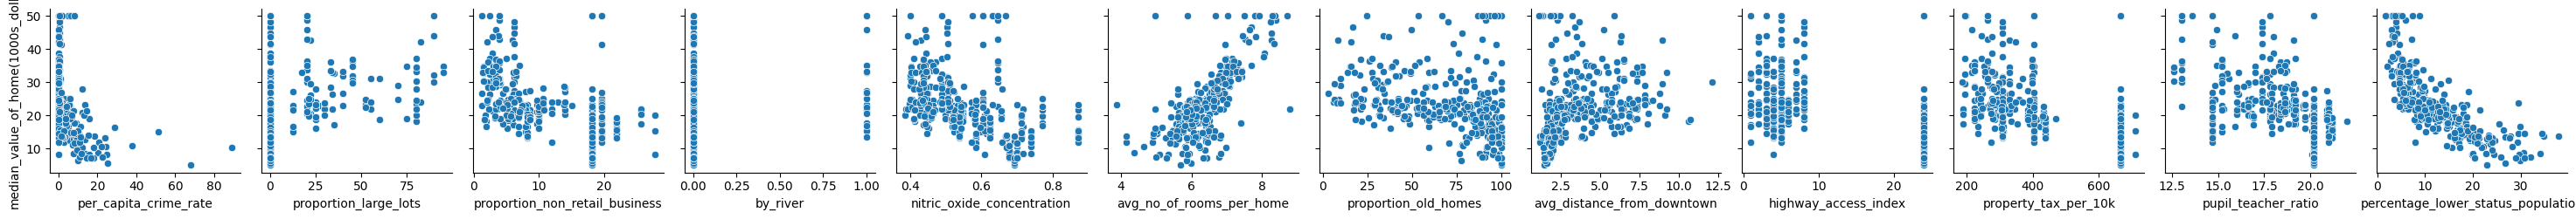

In [9]:
# Visualize the relationship between each feature and the target variable using scatter plots
sns.pairplot(train_data, x_vars=train_data.columns[:-1], y_vars=['median_value_of_home(1000s_dollars)'])
plt.show()

Based on the scatter plots and the correlation matrix, the top 5 features are:

1. avg_no_of_rooms_per_home
2. nitric_oxide_concentration
3. proportion_non_retail_business
4. pupil_teacher_ratio
5. per_capita_crime_rate

In [10]:
new_data = df_main[['avg_no_of_rooms_per_home', 'nitric_oxide_concentration', 'proportion_non_retail_business', 'pupil_teacher_ratio', 'per_capita_crime_rate', 'median_value_of_home(1000s_dollars)']]

In [11]:
new_data.head()

,avg_no_of_rooms_per_home,nitric_oxide_concentration,proportion_non_retail_business,pupil_teacher_ratio,per_capita_crime_rate,median_value_of_home(1000s_dollars)
0,6.575,0.538,2.31,15.3,0.00632,24.0
1,6.421,0.469,7.07,17.8,0.02731,21.6
2,7.185,0.469,7.07,17.8,0.02729,34.7
3,6.998,0.458,2.18,18.7,0.03237,33.4
4,7.147,0.458,2.18,18.7,0.06905,36.2


# Splitting Data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(new_data.iloc[:, :-1], new_data.iloc[:, -1], test_size=0.3, random_state=42)

# Implementing and Plotting Linear Regression 

In [13]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred_lr = model.predict(X_train)
y_test_pred_lr = model.predict(X_test)

# Calculating MSE and R2 score for Linear Regression Model
lr_mse = mean_squared_error(y_test, y_test_pred_lr)
lr_r2 = r2_score(y_test, y_test_pred_lr)

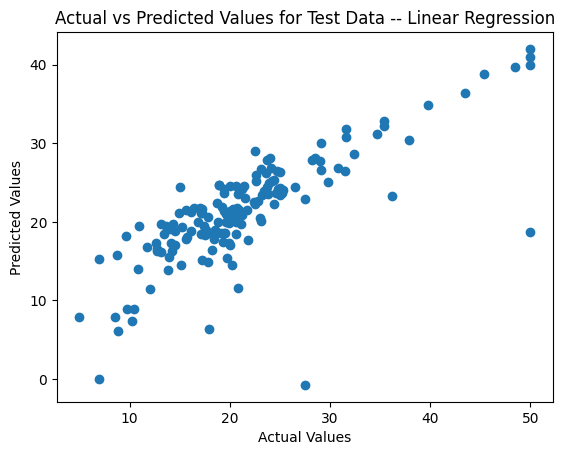

In [14]:
# Plot the predicted vs actual values for the test data
plt.scatter(y_test, y_test_pred_lr)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Test Data -- Linear Regression')
plt.show()

# Implementing Lasso and Ridge Regression

In [15]:
ridge_model = Ridge(alpha=1.0) # alpha is the regularization strength
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, y_pred)
ridge_r2 = r2_score(y_test, y_pred)
print("Ridge Regression - Mean Squared Error:", ridge_mse)
print("Ridge Regression - R-squared score:", ridge_r2)

Ridge Regression - Mean Squared Error: 28.130387710905012
Ridge Regression - R-squared score: 0.6224772639423675


In [16]:
lasso_model = Lasso(alpha=1.0) # alpha is the regularization strength
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

lasso_mse = mean_squared_error(y_test, y_pred)
lasso_r2 = r2_score(y_test, y_pred)
print("Lasso Regression - Mean Squared Error:", lasso_mse)
print("Lasso Regression - R-squared score:", lasso_r2)

Lasso Regression - Mean Squared Error: 29.487129106982366
Lasso Regression - R-squared score: 0.6042691706436315


# Comparison and Interpretation of Models

In [17]:
# Evaluate the performance of the model on the training and test data
print('Linear Regression MSE test: %.3f' % (lr_mse))
print('Linear Regression R^2 test: %.3f' % (lr_r2))
print('Ridge Regression MSE test: %.3f' % (ridge_mse))
print('Ridge Regression R^2 test: %.3f' % (ridge_r2))
print('Lasso Regression MSE test: %.3f' % (lasso_mse))
print('Lasso Regression R^2 test: %.3f' % (lasso_r2))

Linear Regression MSE test: 28.213
Linear Regression R^2 test: 0.621
Ridge Regression MSE test: 28.130
Ridge Regression R^2 test: 0.622
Lasso Regression MSE test: 29.487
Lasso Regression R^2 test: 0.604


The Ridge Regression model is performing similarly to the Linear Regression model, a bit better actually. The Lasso Regression model is performing worse than the Ridge Regression model. The reason behind this could be that the Lasso Regression model is reducing some important features' contribution to zero (which the Ridge Regression is not doing) by imposing higher penalty on them. Hence, in this case using the Ridge Regression model, which doesn't completely wipe out the features' contribution is recommended. 

# Lasso and Ridge Regression with GridSearch CV

In [18]:
# Define range of lambda values
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Create instances of Ridge and Lasso Regression models
ridge_reg = Ridge()
lasso_reg = Lasso()

# Define parameter grid for GridSearchCV
param_grid_ridge = {'alpha': alphas}
param_grid_lasso = {'alpha': alphas}

# Use GridSearchCV to find the best value of lambda for Ridge and Lasso Regression models
ridge_grid_search = GridSearchCV(ridge_reg, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)

lasso_grid_search = GridSearchCV(lasso_reg, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

# Train the Ridge and Lasso Regression models with the best values of lambda
ridge_reg_best = Ridge(alpha=ridge_grid_search.best_params_['alpha'])
lasso_reg_best = Lasso(alpha=lasso_grid_search.best_params_['alpha'])

ridge_reg_best.fit(X_train, y_train)
lasso_reg_best.fit(X_train, y_train)

# Evaluate the performance of the models on the test dataset using MSE and R-squared score
ridge_mse_test = mean_squared_error(y_test, ridge_reg_best.predict(X_test))
ridge_r2_test = r2_score(y_test, ridge_reg_best.predict(X_test))

lasso_mse_test = mean_squared_error(y_test, lasso_reg_best.predict(X_test))
lasso_r2_test = r2_score(y_test, lasso_reg_best.predict(X_test))

# Comparing Model -- After GridSearch CV

In [19]:
# Compare the performance of the Ridge and Lasso Regression models with the lr Regression model
print("Linear Regression MSE test: {:.3f}".format(lr_mse))
print("Linear Regression R^2 test: {:.3f}".format(lr_r2))

print("Ridge Regression MSE After GridSearch test: {:.3f}".format(ridge_mse_test))
print("Ridge Regression R^2 After GridSearch test: {:.3f}".format(ridge_r2_test))

print("Lasso Regression MSE After GridSearch test: {:.3f}".format(lasso_mse_test))
print("Lasso Regression R^2 After GridSearch test: {:.3f}".format(lasso_r2_test))

Linear Regression MSE test: 28.213
Linear Regression R^2 test: 0.621
Ridge Regression MSE After GridSearch test: 28.188
Ridge Regression R^2 After GridSearch test: 0.622
Lasso Regression MSE After GridSearch test: 28.204
Lasso Regression R^2 After GridSearch test: 0.621


In [20]:
print("Ridge Regression Best Alpha: {:.3f}".format(ridge_reg_best.alpha))
print("Lasso Regression Best Alpha: {:.3f}".format(lasso_reg_best.alpha))

Ridge Regression Best Alpha: 0.100
Lasso Regression Best Alpha: 0.001


In [21]:
ridge_coef_df = pd.DataFrame({'feature': X_train.columns, 'coefficient': ridge_reg_best.coef_})
ridge_coef_df

,feature,coefficient
0,avg_no_of_rooms_per_home,7.145601
1,nitric_oxide_concentration,-13.167967
2,proportion_non_retail_business,0.045655
3,pupil_teacher_ratio,-1.022829
4,per_capita_crime_rate,-0.157994


In [22]:
lasso_coef_df = pd.DataFrame({'feature': X_train.columns, 'coefficient': lasso_reg_best.coef_})
lasso_coef_df

,feature,coefficient
0,avg_no_of_rooms_per_home,7.146349
1,nitric_oxide_concentration,-13.680770
2,proportion_non_retail_business,0.052203
3,pupil_teacher_ratio,-1.026550
4,per_capita_crime_rate,-0.156955


# Interpretation -- After GridSearch CV

1. All the three models are performing at a very similar level. But the Lasso and Ridge Regression model are performing just slightly better, Ridge performing the best among all three.
2. Ridge took best alpha as 0.1 and Lasso took 0.001 which suggests that Lasso prefers a higher degree of regularization (which means a smaller alpha value).
3. From the Feature-Coefficient dataframe can be seen that the most significant predictors of the house prices are avg_no_of_rooms_per_home, proportion_non_retail_business. These two variables have positive values, suggesting that the value of the houses go up as the values of these varbiables increase. In contrast, nitric_oxide_concentration, pupil_teacher_ratio, and per_capita_crime_rate make the value of house go down as they go up, which makes sense in real life as well.  